In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


excel_file = 'lvl3_Задание_Выборка.xlsx'
df_08 = pd.read_excel(excel_file, sheet_name='082015')
df_09 = pd.read_excel(excel_file, sheet_name='092015')

df_08 = pd.concat([df_08, df_09], ignore_index=True)

In [139]:
market_counts = df_08['MARKET_KEY'].value_counts()
market_counts

MARKET_KEY
KHR    404
ODE    290
CHG    179
DON    171
ZPR    145
PLT    140
ZKP    130
KIR    122
NIK    107
KHM    101
SUM     75
IVF     71
DNE     53
LVI     30
Name: count, dtype: int64

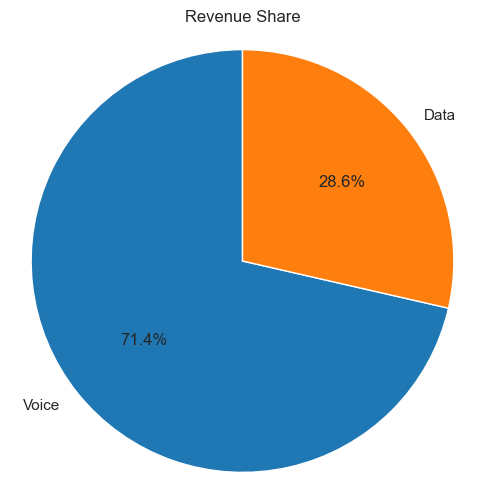

In [140]:
voice_share = df_08['REVENUE_VOICE'].mean()
data_share = df_08['REVENUE_DATA'].mean()

labels = ['Voice', 'Data']
sizes = [voice_share, data_share]
colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Share')

plt.axis('equal')
plt.show()

In [141]:
def group_market_total(df):
    return df.groupby(['MARKET_KEY']).agg({
                                                'SUBS_ACTIVATION_DATE_KEY': 'mean', 
                                                'REVENUE_TOTAL': 'sum',
                                                'REVENUE_VOICE': 'sum',
                                                'REVENUE_DATA': 'sum',
                                                'TRAFFIC_DATA': 'sum',
                                                'MOU': 'sum'}).reset_index()

def group_market_mean(df):
    return df.groupby(['MARKET_KEY']).agg({
                                                'SUBS_ACTIVATION_DATE_KEY': 'mean',
                                                'REVENUE_TOTAL': 'mean',
                                                'REVENUE_VOICE': 'mean',
                                                'REVENUE_DATA': 'mean',
                                                'TRAFFIC_DATA': 'mean',
                                                'MOU': 'mean'}).reset_index()
market_grouped_08_sum = group_market_total(df_08)
market_grouped_08_mean = group_market_mean(df_08)

market_grouped_08_sum.sort_values(by=['REVENUE_TOTAL'], ascending=False, inplace=True)
market_grouped_08_mean.sort_values(by=['REVENUE_TOTAL'], ascending=False, inplace=True)

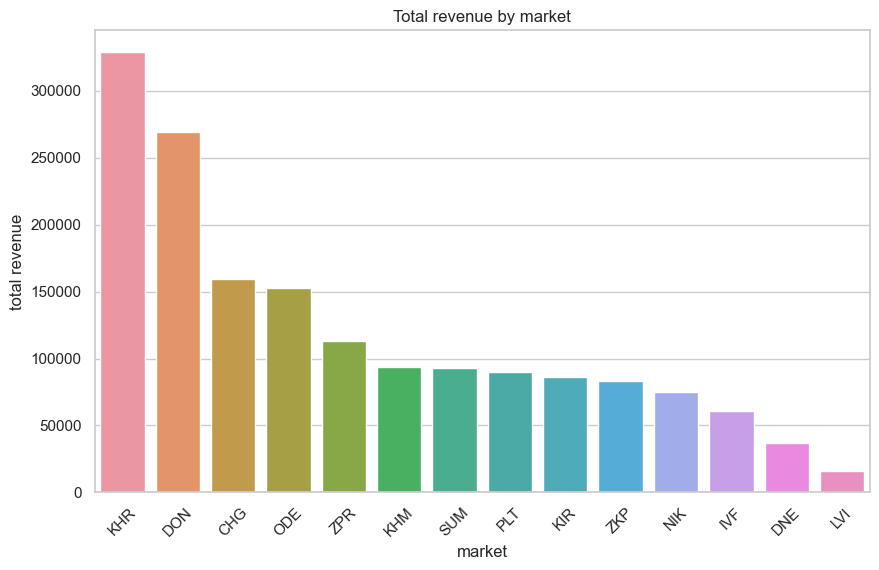

In [142]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x="MARKET_KEY", y="REVENUE_TOTAL", data=market_grouped_08_sum)
plt.title("Total revenue by market")
plt.xlabel("market")
plt.ylabel("total revenue")
plt.xticks(rotation=45)
plt.show()

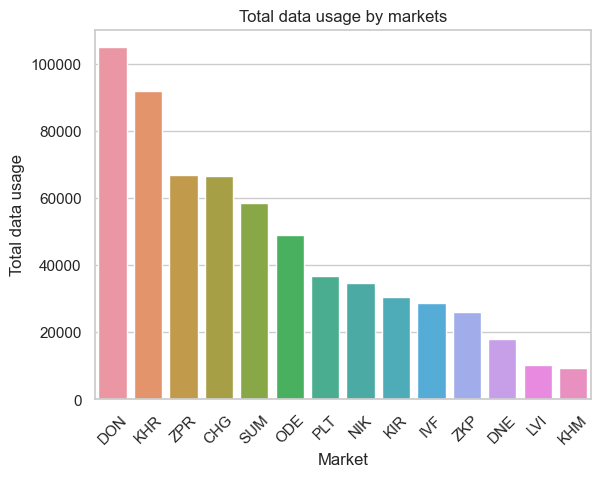

In [143]:
market_grouped_08_sum.sort_values(by=['TRAFFIC_DATA'], ascending=False, inplace=True)

sns.barplot(x="MARKET_KEY", y="TRAFFIC_DATA", data=market_grouped_08_sum)
plt.title("Total data usage by markets")
plt.xlabel("Market")
plt.ylabel("Total data usage")
plt.xticks(rotation=45)
plt.show()

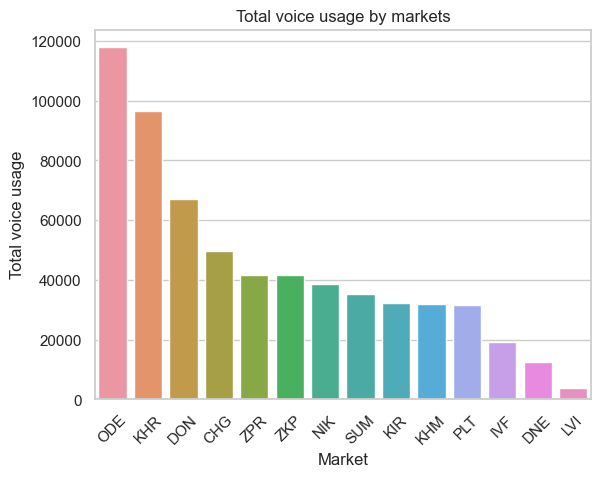

In [144]:
market_grouped_08_sum.sort_values(by=['MOU'], ascending=False, inplace=True)

sns.barplot(x="MARKET_KEY", y="MOU", data=market_grouped_08_sum)
plt.title("Total voice usage by markets")
plt.xlabel("Market")
plt.ylabel("Total voice usage")
plt.xticks(rotation=45)
plt.show()

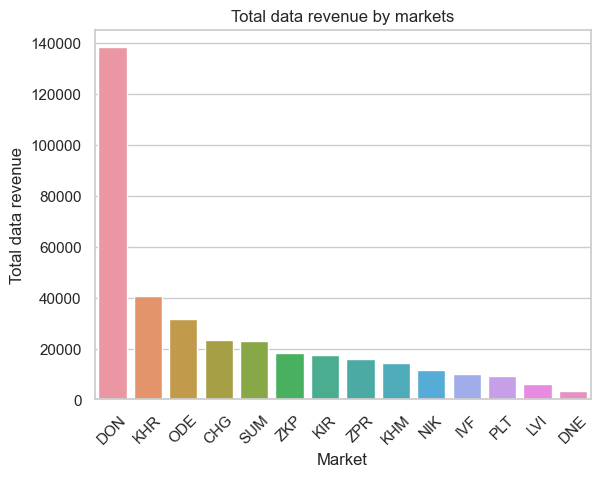

In [145]:
market_grouped_08_sum.sort_values(by=['REVENUE_DATA'], ascending=False, inplace=True)

sns.barplot(x="MARKET_KEY", y="REVENUE_DATA", data=market_grouped_08_sum)
plt.title("Total data revenue by markets")
plt.xlabel("Market")
plt.ylabel("Total data revenue")
plt.xticks(rotation=45)
plt.show()

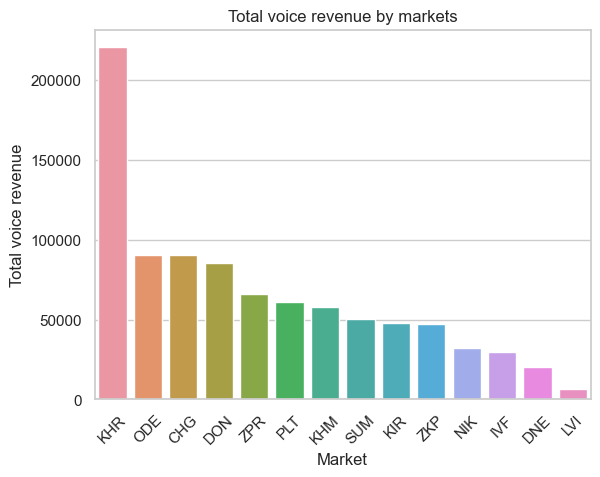

In [146]:
market_grouped_08_sum.sort_values(by=['REVENUE_VOICE'], ascending=False, inplace=True)

sns.barplot(x="MARKET_KEY", y="REVENUE_VOICE", data=market_grouped_08_sum)
plt.title("Total voice revenue by markets")
plt.xlabel("Market")
plt.ylabel("Total voice revenue")
plt.xticks(rotation=45)
plt.show()

In [147]:
import datetime

def calc_time_period(date):
    current_date = datetime.datetime.now()
    date_diff = current_date - date
    return date_diff.days // 360

df_08['time_period'] = df_08['SUBS_ACTIVATION_DATE_KEY'].apply(calc_time_period)
df_08

,ID,SUBS_ACTIVATION_DATE_KEY,REVENUE_TOTAL,REVENUE_VOICE,REVENUE_DATA,TRAFFIC_DATA,MARKET_KEY,MOU,time_period
0,1,2011-12-02,11.075,6.562,4.513,0.247,KHR,40.250,11
1,2,2012-12-27,1940.036,1090.420,1.402,0.077,KHR,445.882,10
2,3,2010-11-21,1127.000,631.242,0.000,0.000,PLT,333.233,12
3,4,2012-02-15,142.286,142.286,0.000,0.000,SUM,479.000,11
4,5,2006-08-01,473.233,169.661,44.643,0.000,PLT,131.884,17
...,...,...,...,...,...,...,...,...,...
2013,1055,2015-04-29,592.732,480.348,0.777,0.043,CHG,340.084,8
2014,1056,2009-08-26,0.000,0.000,0.000,0.000,CHG,0.833,14
2015,1057,2014-08-13,1755.376,1433.054,0.000,0.000,CHG,1064.199,9
2016,1058,2015-04-22,1458.590,388.277,132.812,2258.985,CHG,388.000,8


In [148]:
records_by_year = df_08['time_period'].value_counts().sort_index()
pd.DataFrame(records_by_year).T

time_period,7,8,9,10,11,12,13,14,15,16,17
count,15,576,291,226,205,159,99,80,107,166,94


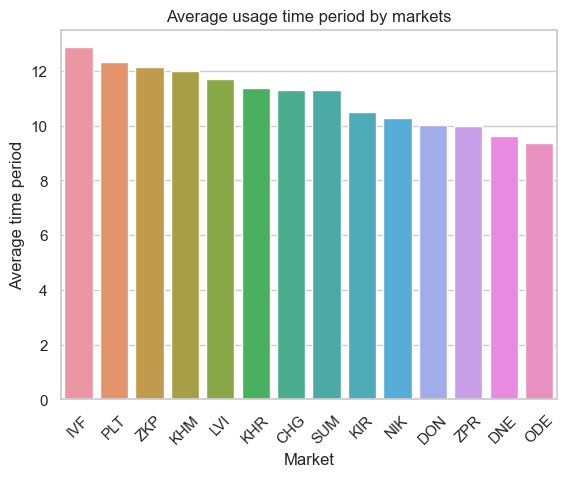

In [149]:
market_grouped_08_mean = df_08.groupby(['MARKET_KEY']).agg({
                                                'SUBS_ACTIVATION_DATE_KEY': 'mean', 
                                                'REVENUE_TOTAL': 'mean',
                                                'REVENUE_VOICE': 'mean',
                                                'REVENUE_DATA': 'mean',
                                                'TRAFFIC_DATA': 'mean',
                                                'MOU': 'mean',
                                                'time_period': 'mean'}).reset_index()

market_grouped_08_mean.sort_values(by=['time_period'], ascending=False, inplace=True)

sns.barplot(x="MARKET_KEY", y="time_period", data=market_grouped_08_mean)
plt.title("Average usage time period by markets")
plt.xlabel("Market")
plt.ylabel("Average time period")
plt.xticks(rotation=45)
plt.show()

In [150]:
date_grouped_08_mean = df_08.groupby(['time_period']).agg({
                                                        'REVENUE_TOTAL': 'mean',
                                                        'REVENUE_VOICE': 'mean',
                                                        'REVENUE_DATA': 'mean',
                                                        'TRAFFIC_DATA': 'mean',
                                                        'MOU': 'mean'}).reset_index()
date_grouped_08_mean = date_grouped_08_mean.drop(0) # too few data
date_grouped_08_mean

,time_period,REVENUE_TOTAL,REVENUE_VOICE,REVENUE_DATA,TRAFFIC_DATA,MOU
1,8,840.849113,320.140557,340.366056,438.235627,251.951535
2,9,617.376997,327.420845,128.312093,408.884007,278.753430
3,10,733.711584,426.288929,102.671637,400.653093,389.959274
4,11,603.172263,364.211561,118.949166,138.530390,304.124171
5,12,835.738522,554.985623,105.419465,366.770547,315.175478
6,13,912.643596,481.025040,104.922828,323.227343,431.745495
7,14,975.478962,660.854175,71.873825,40.936712,383.634200
8,15,1329.521187,1002.569523,151.007766,46.041925,357.976458
9,16,1104.151886,725.026247,85.671813,122.315602,324.354819
10,17,789.483202,407.580904,193.249787,230.918064,288.373574


In [151]:
date_grouped_08_sum = df_08.groupby(['time_period']).agg({
                                                        'REVENUE_TOTAL': 'sum',
                                                        'REVENUE_VOICE': 'sum',
                                                        'REVENUE_DATA': 'sum',
                                                        'TRAFFIC_DATA': 'sum',
                                                        'MOU': 'sum'}).reset_index()
date_grouped_08_sum = date_grouped_08_sum.drop(0)
date_grouped_08_sum

,time_period,REVENUE_TOTAL,REVENUE_VOICE,REVENUE_DATA,TRAFFIC_DATA,MOU
1,8,484329.089,184400.961,196050.848,252423.721,145124.084
2,9,179656.706,95279.466,37338.819,118985.246,81117.248
3,10,165818.818,96341.298,23203.790,90547.599,88130.796
4,11,123650.314,74663.370,24384.579,28398.730,62345.455
5,12,132882.425,88242.714,16761.695,58316.517,50112.901
6,13,90351.716,47621.479,10387.360,31999.507,42742.804
7,14,78038.317,52868.334,5749.906,3274.937,30690.736
8,15,142258.767,107274.939,16157.831,4926.486,38303.481
9,16,183289.213,120354.357,14221.521,20304.390,53842.900
10,17,74211.421,38312.605,18165.480,21706.298,27107.116


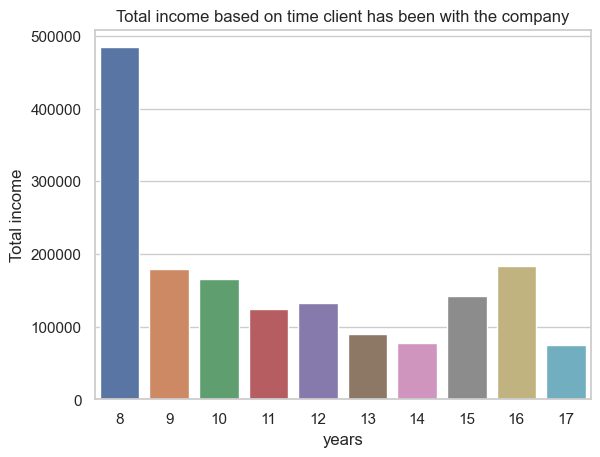

In [152]:
date_grouped_08_sum.sort_values(by=['REVENUE_TOTAL'], ascending=False, inplace=True)

sns.set(style="whitegrid")

sns.barplot(x="time_period", y="REVENUE_TOTAL", data=date_grouped_08_sum)
plt.title("Total income based on time client has been with the company")
plt.xlabel("years")
plt.ylabel("Total income")
plt.show()

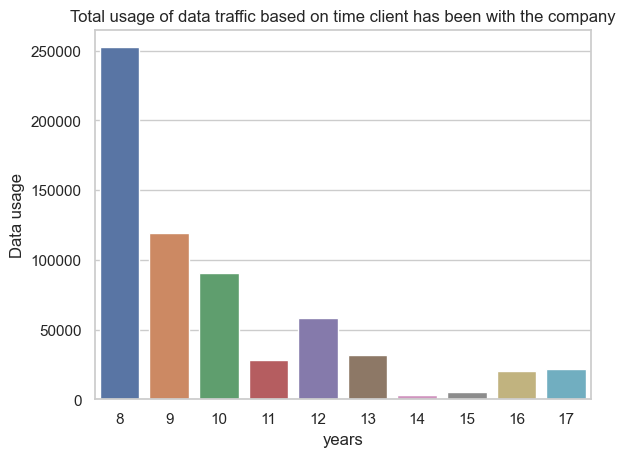

In [153]:
date_grouped_08_sum.sort_values(by=['TRAFFIC_DATA'], ascending=False, inplace=True)

sns.barplot(x="time_period", y="TRAFFIC_DATA", data=date_grouped_08_sum)
plt.title("Total usage of data traffic based on time client has been with the company")
plt.xlabel("years")
plt.ylabel("Data usage")
plt.show()

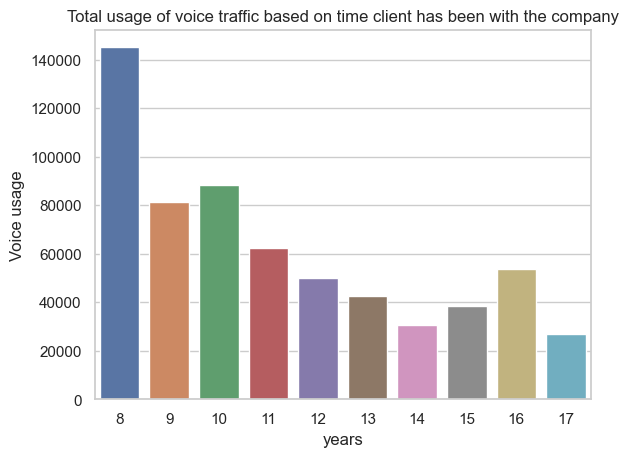

In [154]:
date_grouped_08_sum.sort_values(by=['MOU'], ascending=False, inplace=True)

sns.barplot(x="time_period", y="MOU", data=date_grouped_08_sum)
plt.title("Total usage of voice traffic based on time client has been with the company")
plt.xlabel("years")
plt.ylabel("Voice usage")
plt.show()

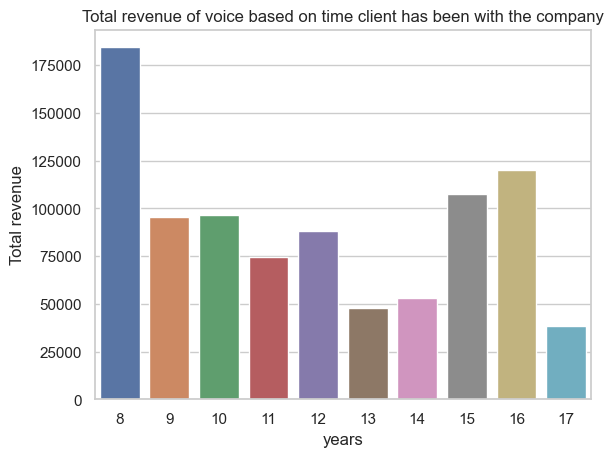

In [155]:
date_grouped_08_sum.sort_values(by=['REVENUE_VOICE'], ascending=False, inplace=True)

sns.barplot(x="time_period", y="REVENUE_VOICE", data=date_grouped_08_sum)
plt.title("Total revenue of voice based on time client has been with the company")
plt.xlabel("years")
plt.ylabel("Total revenue")
plt.show()

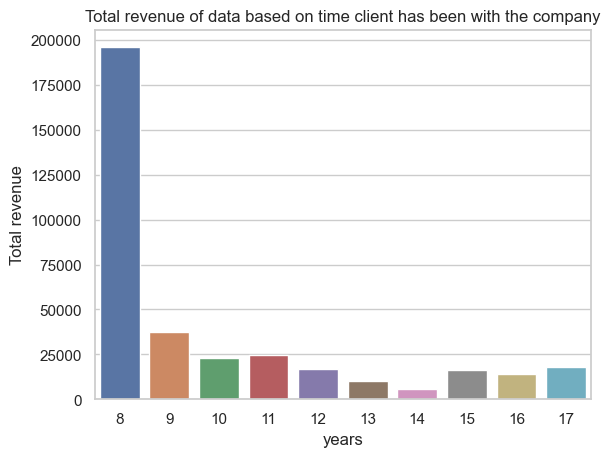

In [156]:
date_grouped_08_sum.sort_values(by=['REVENUE_DATA'], ascending=False, inplace=True)

sns.barplot(x="time_period", y="REVENUE_DATA", data=date_grouped_08_sum)
plt.title("Total revenue of data based on time client has been with the company")
plt.xlabel("years")
plt.ylabel("Total revenue")
plt.show()